# Introduction...

# 1. Flux Balance Analysis Process using Cobra Overview

## 1.1  Cobra FBA of _E. coli's_ Metabolism


Experiment ID: bd4dff1a-810b-11eb-8dc0-f834416ad528
Created: 03/09/2021 at 11:14:58
Completed in 0.396223 seconds


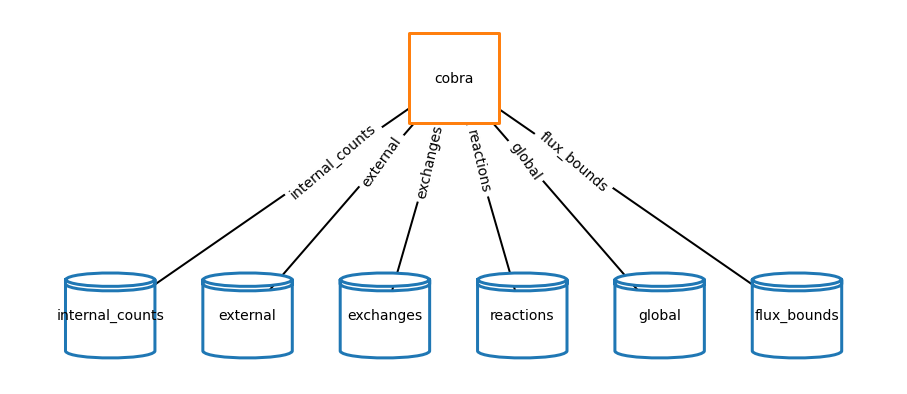

In [1]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra
cobra_timeseries, cobra = simulate_cobra(total_time = 200)

fig_topology = plot_topology(cobra)

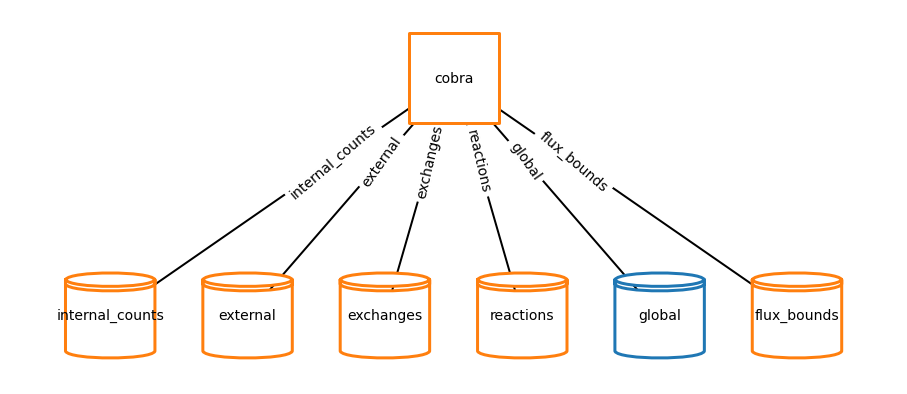

In [2]:
config = {
    'process_colors':{
        'Cobra':'tab:red'
    },
    'store_colors':{
        'internal_counts':'tab:orange',
        'external':'tab:orange',
        'exchanges':'tab:orange',
        'reactions':'tab:orange',
        'flux_bounds':'tab:orange'
    },
}
#Plot the Simulation Topology
fig_topology = plot_topology(cobra, config)



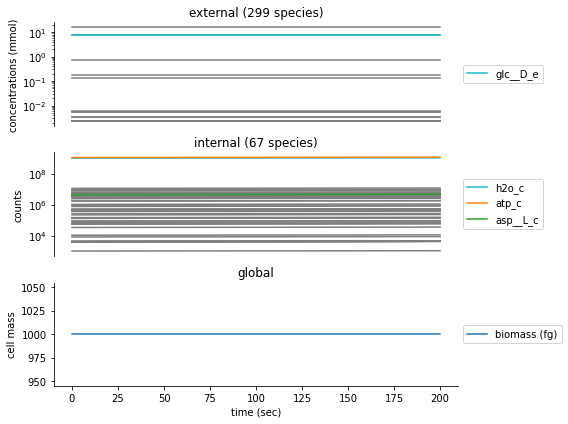

In [3]:
#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

## 1.2 Adding a Derivers to Update Biomass and Volume

In [4]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_cobra_composite
from bioscrape_cobra.plot import plot_metabolism
from vivarium.plots.topology import plot_topology

#Simulate Cobra Composite
cobra_timeseries, cobra_composite = simulate_cobra_composite(total_time = 2500)


Experiment ID: c286494c-810b-11eb-bbb6-f834416ad528
Created: 03/09/2021 at 11:15:07
Completed in 7.75 seconds


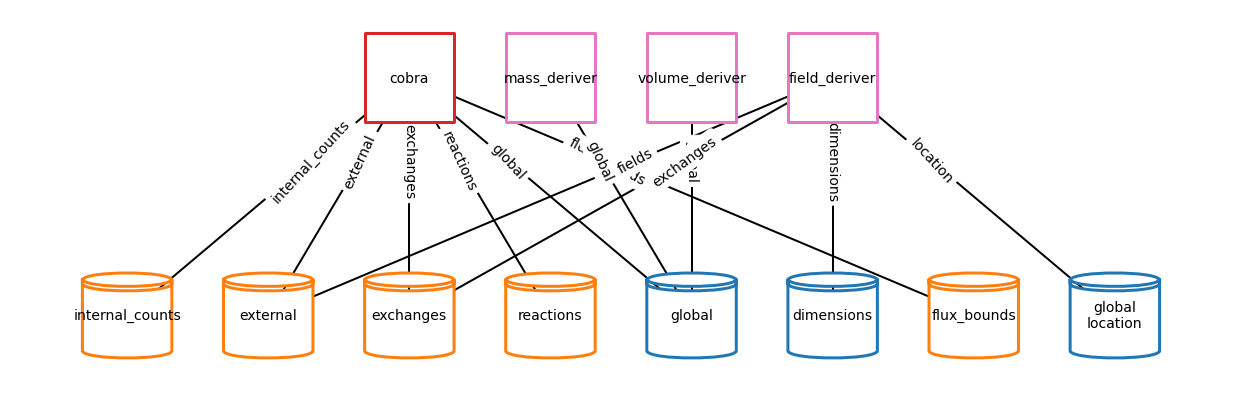

In [5]:
#Plot the Topology
config = {
    'process_colors':{
        'cobra':'tab:red',
        'mass_deriver':'tab:pink',
        'volume_deriver':'tab:pink',
        'field_deriver':'tab:pink'
    },
    'store_colors':{
        'internal_counts':'tab:orange',
        'external':'tab:orange',
        'exchanges':'tab:orange',
        'reactions':'tab:orange',
        'flux_bounds':'tab:orange'
    },
}

fig_topology = plot_topology(cobra_composite, config)

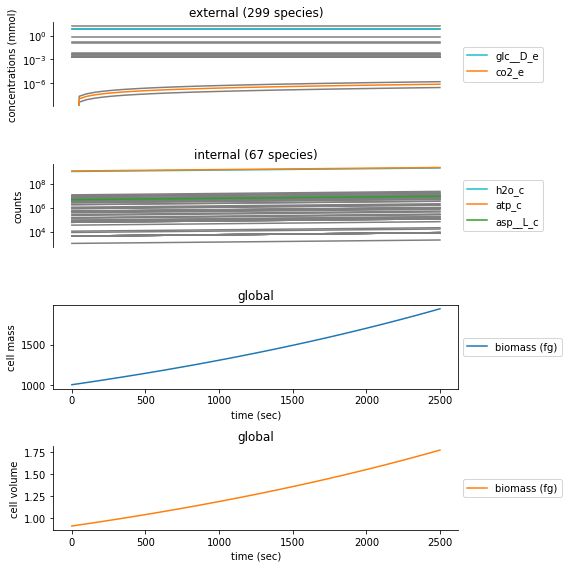

In [6]:
#Plot the Simulation Output
fig_timeseries = plot_metabolism(cobra_timeseries)

# 2. Chemical Reaction Networks with Bioscrape Overview

## 2.1 A Deterministic Bioscrape Simulation of the Lac Operon CRN

In [7]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Deterministically
bioscrape_timeseries_det, bioscrape_composite_det = simulate_bioscrape(
    total_time = 1500, initial_glucose = 5, initial_lactose = 10)


Experiment ID: c9c9e4ab-810b-11eb-9201-f834416ad528
Created: 03/09/2021 at 11:15:19
Completed in 0.180557 seconds


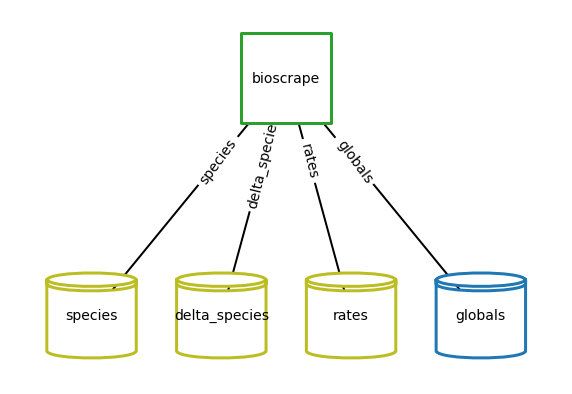

In [8]:
#plot the Topology
config = {
    'process_colors':{
        'bioscrape':'tab:green',
    },
    'store_colors':{
        'species':'tab:olive',
        'delta_species':'tab:olive',
        'rates':'tab:olive',
    },
}

fig_topology = plot_topology(bioscrape_composite_det, config)

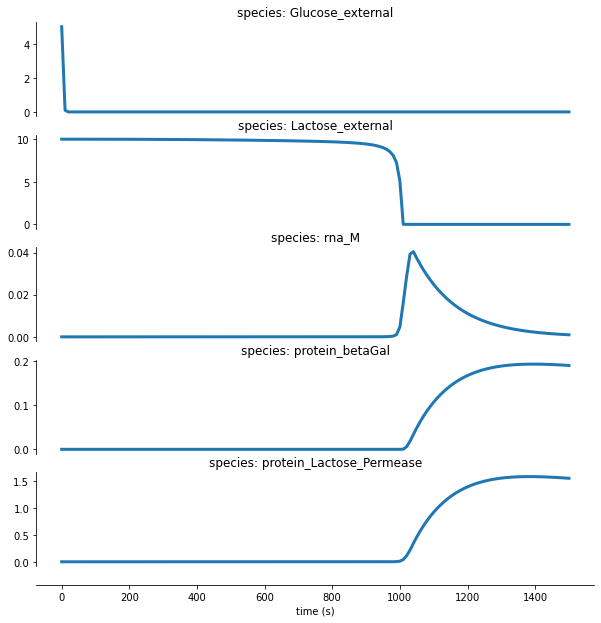

In [9]:
#Plot the CRN Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries_det, 
    variables = species_to_plot
)

## 2.2 A Stochastic Bioscrape Simulation of the Lac Operon CRN

In [10]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_bioscrape
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_single

#Simulate the Lac Operon CRN Stochastically
bioscrape_timeseries_stoch, bioscrape_composite_stoch = simulate_bioscrape(
    total_time = 2500, stochastic = True, initial_glucose = 10**6, initial_lactose = 10**6)




Experiment ID: ca6acb55-810b-11eb-8239-f834416ad528
Created: 03/09/2021 at 11:15:20
Completed in 2.73 seconds


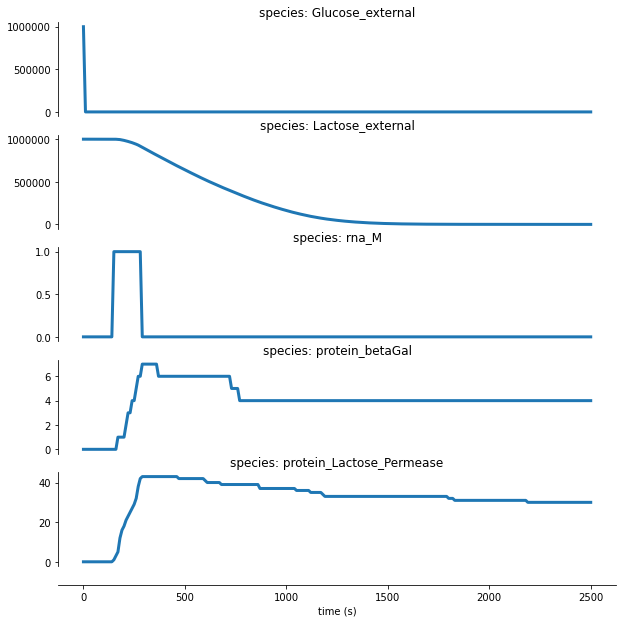

In [11]:
#Plot a Stochastic Trajectory
species_to_plot = [('species', 'Glucose_external'), ('species', 'Lactose_external'), 
                   ('species', 'rna_M'), ('species', 'protein_betaGal'),
                   ('species', 'protein_Lactose_Permease')]

fig_timeseries = plot_single(
    bioscrape_timeseries_stoch, 
    variables = species_to_plot
)

# 3. Multibody and Spatial Simulations

## 3.1 Growing and Dividing Cells

In [12]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_grow_divide
from vivarium.plots.topology import plot_topology
from bioscrape_cobra.plot import plot_multigen

#Simulate Growing, Dividing Cells
grow_divide_timeseries, grow_divide_composite_intial, grow_divide_composite_final = simulate_grow_divide(
    total_time = 100, growth_rate = .006, growth_noise = .005)


Experiment ID: cc8822a7-810b-11eb-abed-f834416ad528
Created: 03/09/2021 at 11:15:24
Completed in 0.141651 seconds


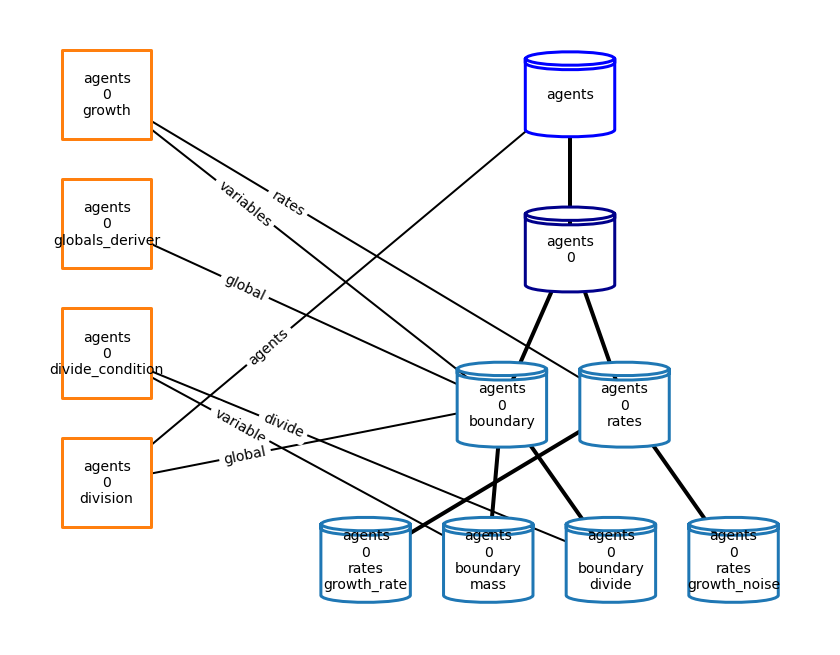

In [13]:
#Plot The Initial Topology
config = {
    'graph_format': 'hierarchy',
    'process_colors':{
        'bioscrape':'tab:green',
    },
    'store_colors':{
        'agents':'blue',
        'agents\n0':'darkblue',
        'rates':'tab:olive',
    },
}
fig_topology = plot_topology(grow_divide_composite_intial, config)

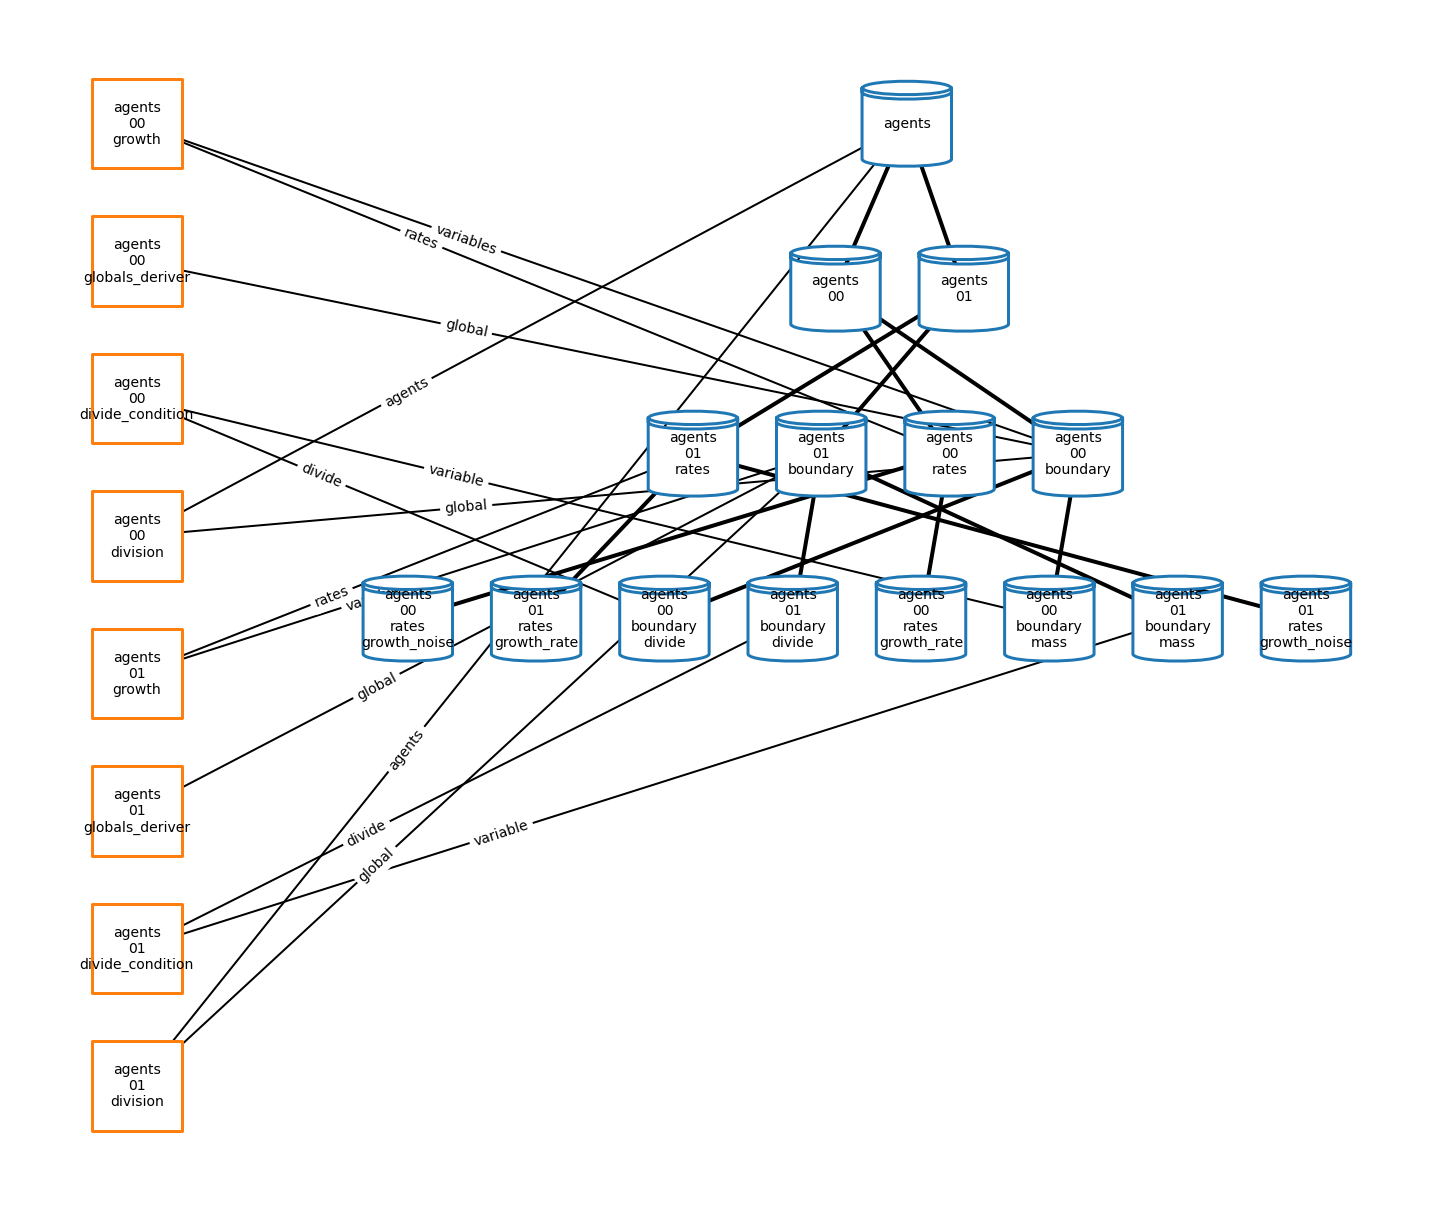

In [14]:
#Plot The Initial Topology
config = {
    'graph_format': 'hierarchy',
    'process_colors':{
        
    },
    'store_colors':{
        
    },
    'coordinates':{
        
    }
}
fig_topology = plot_topology(grow_divide_composite_final, config)

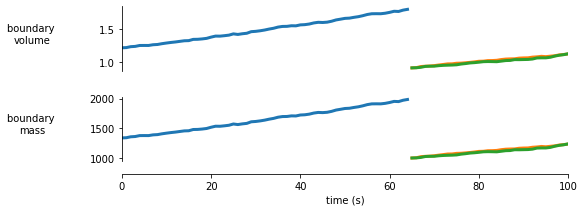

In [15]:
#Plot Cell Trajectories
fig_trajectories = plot_multigen(grow_divide_timeseries, variables = [("boundary", "mass"), ("boundary", "volume")])

## 3.2 A Lattice Model of Diffusion

In [16]:
%matplotlib inline
from bioscrape_cobra.simulate import simulate_diffusion
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np
import matplotlib as plt

#Grid Size
N = 10
bounds = [N, N]

#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[3, 6] = 100
initial_state[3, 7] = 50
initial_state[6, 6] = 100
initial_state[6, 7] = 50
initial_state[2, 4] = 100
initial_state[2, 3] = 25
initial_state[3, 3] = 100
initial_state[3, 2] = 25
initial_state[4, 2] = 100
initial_state[5, 2] = 100
initial_state[6, 2] = 25
initial_state[6, 3] = 100
initial_state[7, 3] = 25
initial_state[7, 4] = 100

#Simulate diffusion
diffusion_data, diffusion_composite = simulate_diffusion(
    total_time = 200, 
    initial_state = initial_state, 
    bounds = bounds,
    diffusion_rate = .005)


Experiment ID: cd590a9b-810b-11eb-b626-f834416ad528
Created: 03/09/2021 at 11:15:25
Completed in 0.788888 seconds


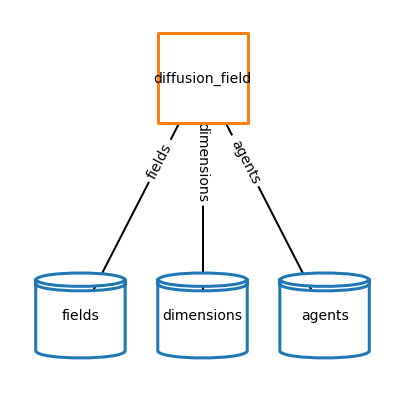

In [17]:
#Plot Topology
fig_topology = plot_topology(diffusion_composite)

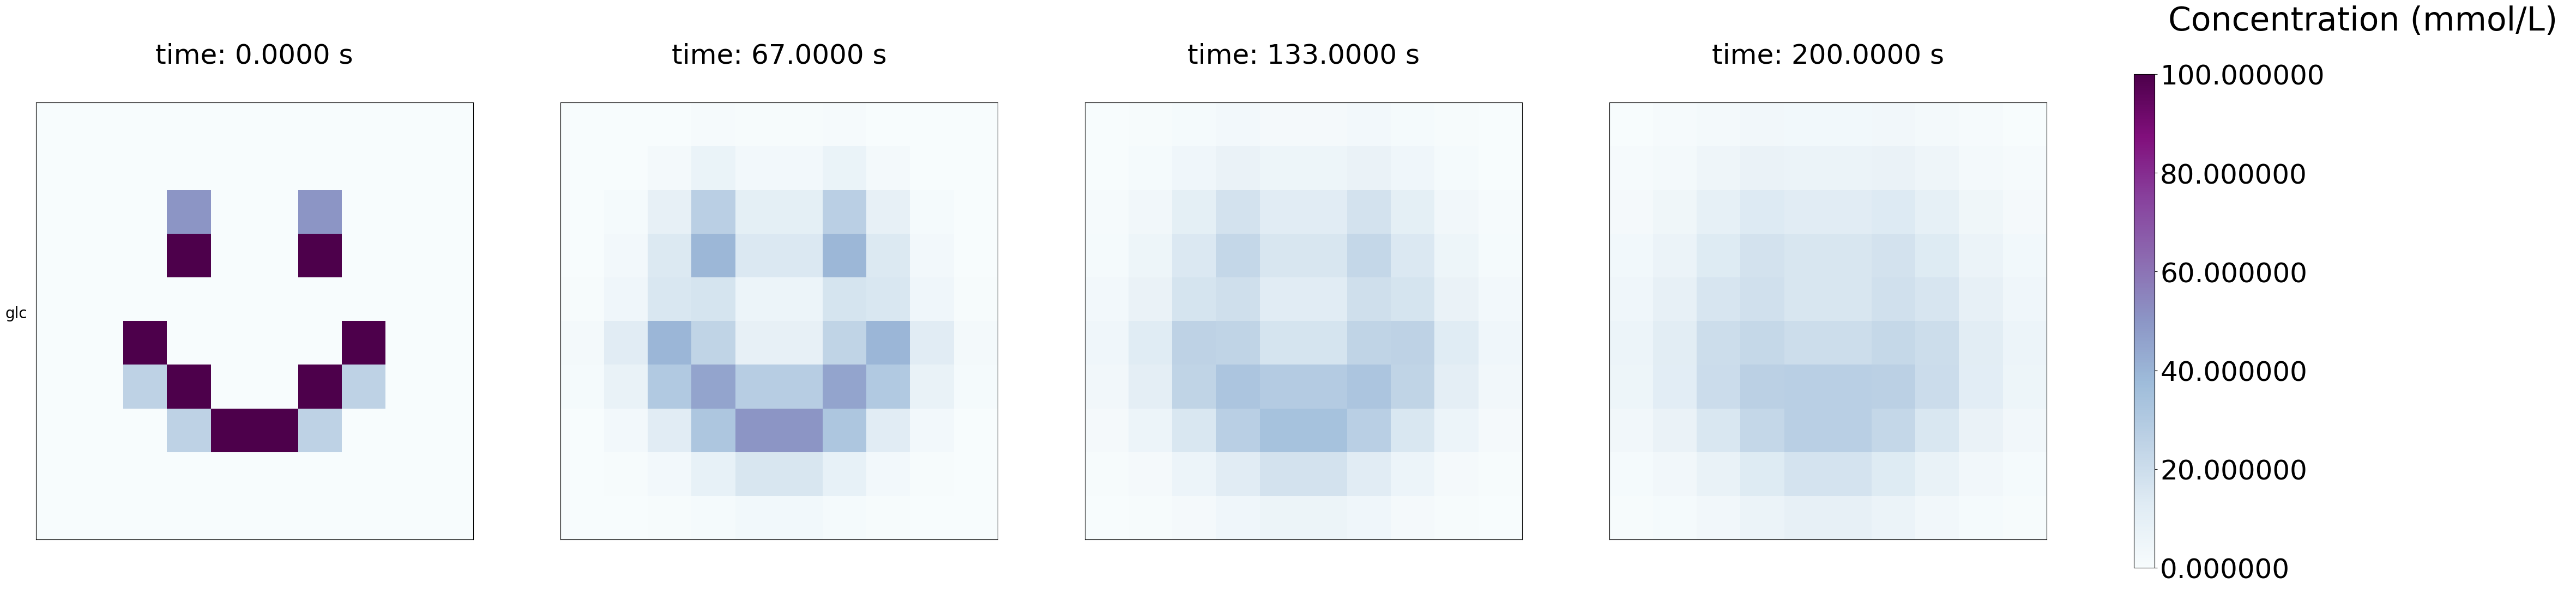

In [18]:
#Reformat Data
agents, fields = format_snapshot_data(diffusion_data)

#Plot Simulation Snapshots
fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)

## 3.3 Placing Agents on the Lattice

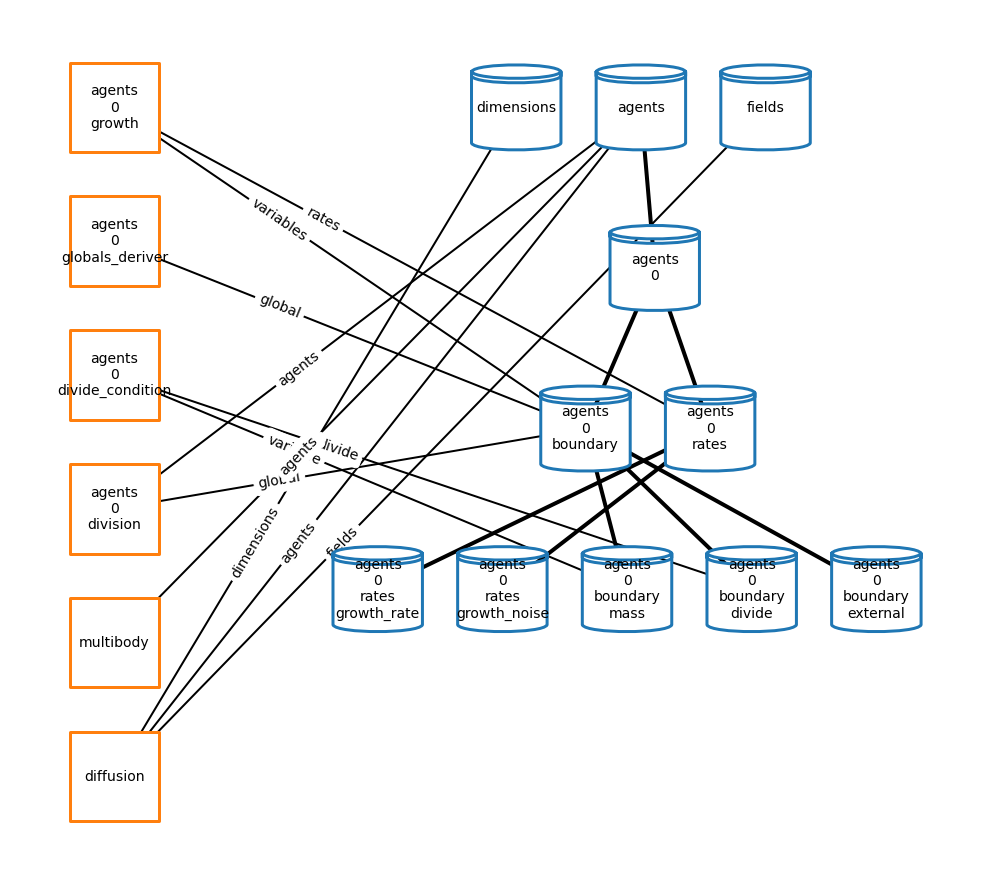

In [19]:
from bioscrape_cobra.simulate import simulate_grow_divide_lattice, get_lattice_grow_divide_composite
from vivarium.plots.topology import plot_topology
from vivarium_multibody.plots.snapshots import plot_snapshots, format_snapshot_data
import numpy as np

#Grid Size
N = 10
bounds = [N, N]
#Set up a positive initial state
initial_state = np.zeros((N, N))
initial_state[0, 0] = 100
initial_state[0, -1] = 100
initial_state[-1, 0] = 100
initial_state[-1, -1] = 100

#Create the a Composite with Agents (Cells) on a Lattice
lattice_grow_divide_composite = get_lattice_grow_divide_composite(
    bounds = bounds, 
    initial_concentration = initial_state,
    diffusion_rate = .01)

#Plot the topology
config = {'graph_format': 'hierarchy'}
fig_topology = plot_topology(lattice_grow_divide_composite, config)

In [20]:
#Simulate the Composite
lattice_grow_divide_data = simulate_grow_divide_lattice(lattice_grow_divide_composite, total_time = 150)


Experiment ID: cefd4fcc-810b-11eb-a75e-f834416ad528
Created: 03/09/2021 at 11:15:28
Completed in 4.99 seconds


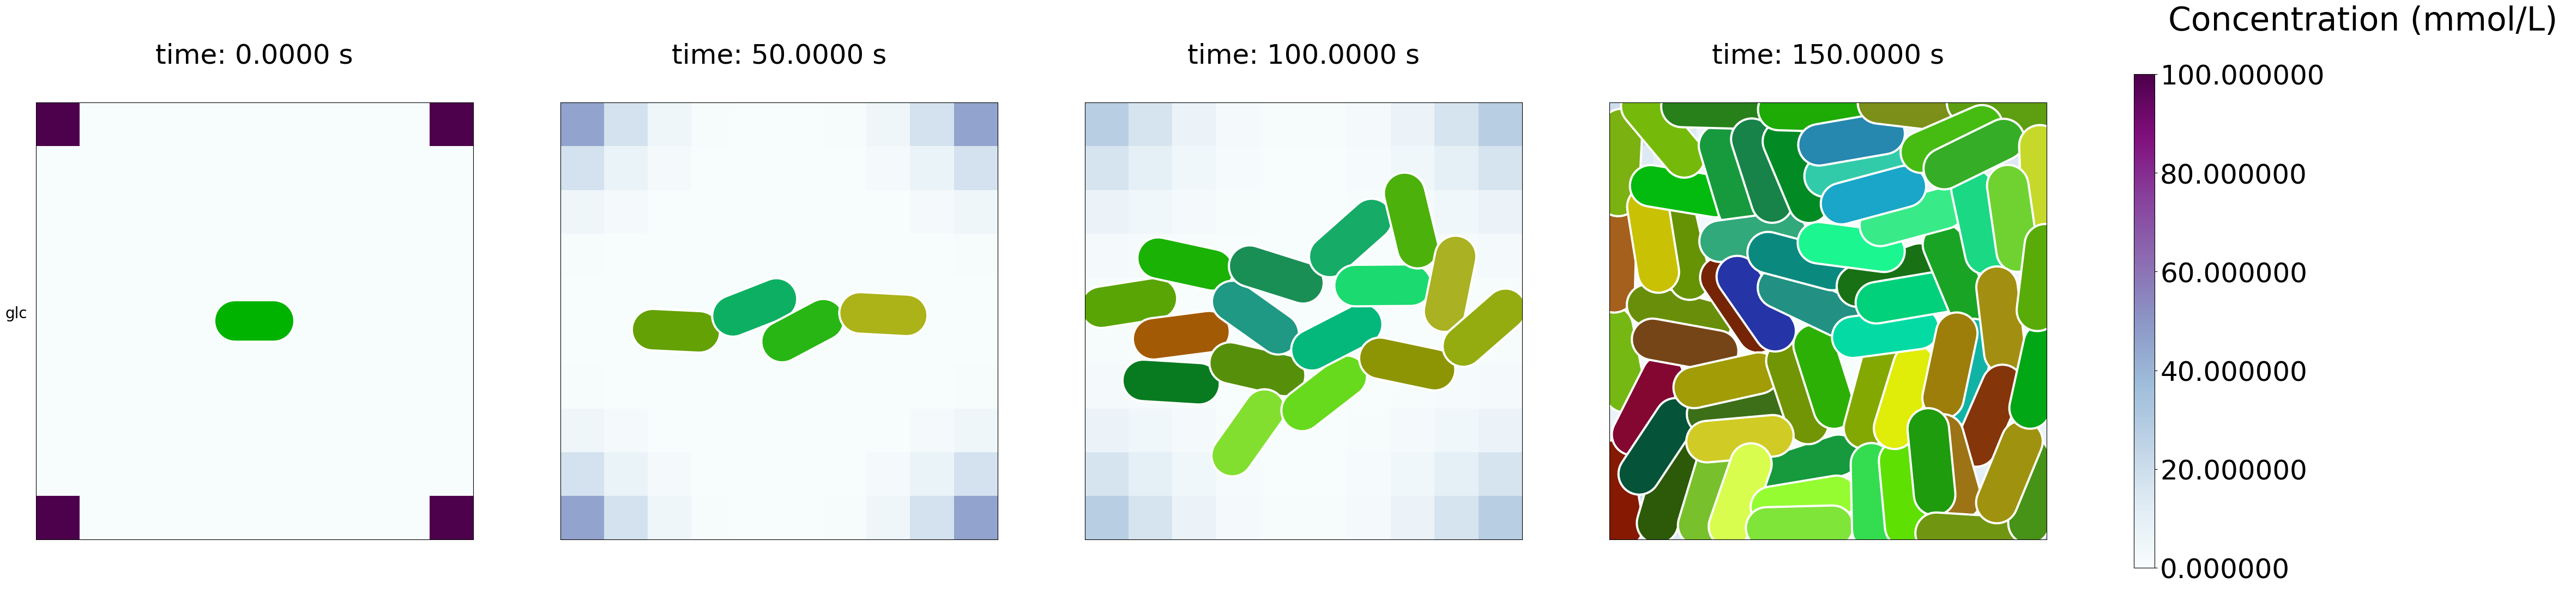

In [21]:
#Plot snapshots of the simulation
agents, fields = format_snapshot_data(lattice_grow_divide_data)

fig2 = plot_snapshots( 
    bounds=bounds,
    fields=fields,
    agents=agents,
    n_snapshots=4
)

# 4. Connecting Bioscrape and COBRA in Lineage of Growing and Dividing cells on a Lattice.

## 4.1 Bioscrape and COBRA in a Single Deterministic Cell

In [22]:
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_det = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config())

biocobra_data_det, comp0_det = simulate_bioscrape_cobra(
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    total_time = 2500, 
    output_type='timeseries')




Experiment ID: deterministic
Created: 03/09/2021 at 11:15:40


C:\Users\wp_ix\miniconda3\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 8.36 seconds


In [59]:
su = .75
RS = 0 #store row
RP = -3*su #process row

plot_config = {
    'graph_format': 'hierarchy',
    'dashed_edges':True,
    'show_ports':False,
    'remove_nodes':[
        'boundary\ndimensions', 
        'boundary\nno_units',
        'boundary\ntime',
        'clock',
        'strip_units',
        'hidden_exchanges',
        'dimensions',
        'delta_concentrations',
        'boundary\nexchanges',
        
        'agents\n0\nboundary\ndimensions', 
        'agents\n0\nboundary\nno_units',
        'agents\n0\nboundary\ntime',
        'agents\n0\nclock',
        'agents\n0\nstrip_units',
        'agents\n0\nhidden_exchanges',
        'agents\n0\ndelta_concentrations',
        'agents\n0\nboundary\nexchanges'
    ],
    'process_colors':{
        'cobra':'tab:orange',
        'mass\nderiver':'tab:orange',
        'volume\nderiver':'tab:orange',
        'field\ncounts\nderiver':'tab:gray',
        
        'biomass\nadaptor':'tab:green',
        'bioscrape':'tab:green',
        'flux\nadaptor':'tab:green',
        'dilution rate\nadaptor':'tab:green',
        'delta counts\nto\nconcs':'tab:green',
        
        'clock':'tab:gray',
        'strip\nunits':'tab:gray',
        'local\nfield':'tab:gray',
        
        'division':'tab:cyan',
        'divide\ncondition':'tab:cyan',
        
        'diffusion':'tab:blue',
        'multibody':'tab:blue'
    },
    'store_colors':{
        'flux\nbounds':'tab:orange',
        'internal\ncounts':'tab:orange',
        'reactions':'tab:orange',
        'hidden\nexchanges':'tab:orange',
        'cobra\nexternal':'tab:orange',
        
        'rates':'tab:green',
        'species':'tab:green',
        'delta\nspecies':'tab:green',
        'delta\nconcs':'tab:green',
        
        'agents':'tab:cyan',
        'agents\n0':'tab:cyan',
        
        'boundary':'tab:gray',
        'boundary\nmass':'tab:cyan',
        'boundary\ndivide':'tab:cyan',
        'boundary\nexternal':'tab:gray',
        'boundary\nlocation':'tab:gray',
        'boundary\nexchanges':'tab:gray',
        'boundary\n(no units)':'tab:gray',
        'boundary\ntime':'tab:gray',
        'dimensions':'tab:gray',
        
        'field\ncounts\nderiver':'tab:gray',
        
        'fields':'tab:blue',
        
    },
    'coordinates':{
        
        
        'agents':(0, RS+2*su),
        'agents\n0':(0, RS+su),
        
        'cobra':(-3*su, RP),
        'mass\nderiver':(-2*su, RP),
        'volume\nderiver':(-1*su, RP),
        
        'reactions':(-4*su, RS),
        'internal\ncounts':(-3*su, RS),
        'cobra\nexternal':(-2*su, RS),
        'flux\nbounds':(-1*su, RS),
        
        'flux\nadaptor':(0*su, RP),
        'bioscrape':(1*su, RP),
        'dilution rate\nadaptor':(2*su, RP),
        'biomass\nadaptor':(3*su, RP),
        'delta counts\nto\nconcs':(2*su, RP),
        
        
        'species':(0, RS),
        'rates':(su, RS),
        'delta\nspecies':(2*su, RS),
        'delta\nconcs':(3*su, RS),
        
        'local\nfield':(4*su, RP),
        'field\ncounts\nderiver':(5*su, RP),
        
        'division':(3*su, RS+2*su),
        'divide\ncondition':(4*su, RS+2*su),
        
        'boundary':(3*su, RS),
        'boundary\nexternal':(4*su, RS-.5*su),
        'boundary\nlocation':(5*su, RS-.5*su),
        'boundary\nexchanges':(5.5*su, RS-su),
        'boundary\nmass':(4*su, RS+.5*su),
        'boundary\ndivide':(5*su, RS+.5*su),
    
        'multibody':(3*su, RS+3*su),
        'diffusion':(4*su, RS+3*su),
        'fields':(6*su, RS),
    },
    'node_labels' : {
        'flux_bounds':'flux\nbounds',
        'internal_counts':'internal\ncounts',
        'cobra_external':'cobra\nexternal',
        'hidden_exchanges':'hidden\nexchanges',
        'flux_adaptor':'flux\nadaptor',
        'dilution_rate_adaptor':'dilution rate\nadaptor',
        'biomass_adaptor':'biomass\nadaptor',
        'mass_deriver':'mass\nderiver',
        'volume_adaptor':'volume\nadaptor',
        'delta_species:':'delta\nspecies',
        'mass_deriver':'mass\nderiver',
        'volume_deriver':'volume\nderiver',
        'local_field': 'local\nfield',
        'boundary\nno_units':'boundary\n(no units)',
        'strip_units':'strip\nunits',
        'delta_concentrations':'delta\nconcs',
        'delta_counts_to_concs':'delta counts\nto\nconcs',
        'delta_species':'delta\nspecies',
        'field_counts_deriver':"field\ncounts\nderiver",
        
        'agents\n0\ncobra':'cobra',
        'agents\n0\nbioscrape':'bioscrape',
        'agents\n0\nflux_adaptor':'flux\nadaptor',
        'agents\n0\ndilution_rate_adaptor':'dilution rate\nadaptor',
        'agents\n0\nclock':'clock',
        'agents\n0\nmass_deriver':'mass\nderiver',
        'agents\n0\nvolume_deriver':'volume\nderiver',
        'agents\n0\nbiomass_adaptor':'biomass\nadaptor',
        'agents\n0\nstrip_units':'strip\nunits',
        'agents\n0\nlocal_field':'local\nfield',
        'agents\n0\ndivide_condition':'divide\ncondition',
        'agents\n0\ndivision':'division',
        'agents\n0\ndelta_counts_to_concs':'delta counts\nto\nconcs',
        'agents\n0\nfield_counts_deriver':'field\ncounts\nderiver',
        
        'agents\n0\nspecies':'species',
        'agents\n0\ninternal_counts':"internal\ncounts",
        'agents\n0\ndelta_species':'delta\nspecies',
        'agents\n0\nreactions':'reactions',
        'agents\n0\ninternal_counts':'internal\ncounts',
        'agents\n0\nrates':'rates',
        'agents\n0\nboundary':'boundary',
        'agents\n0\ncobra_external':'cobra\nexternal',
        'agents\n0\nhidden_exchanges':'hidden\nexchanges',
        'agents\n0\nflux_bounds':'flux\nbounds',
        'agents\n0\nboundary\ntime':'boundary\ntime',
        'agents\n0\nboundary\nexternal':'boundary\nexternal',
        'agents\n0\nboundary\ndivide':'boundary\ndivide',
        'agents\n0\nboundary\nmass':'boundary\nmass',
        'agents\n0\nboundary\nexchanges':'boundary\nexchanges',
        'agents\n0\nboundary\nlocation':'boundary\nlocation',
        'agents\n0\nboundary\nno_units':'boundary\n(no units)'
        
    }
}

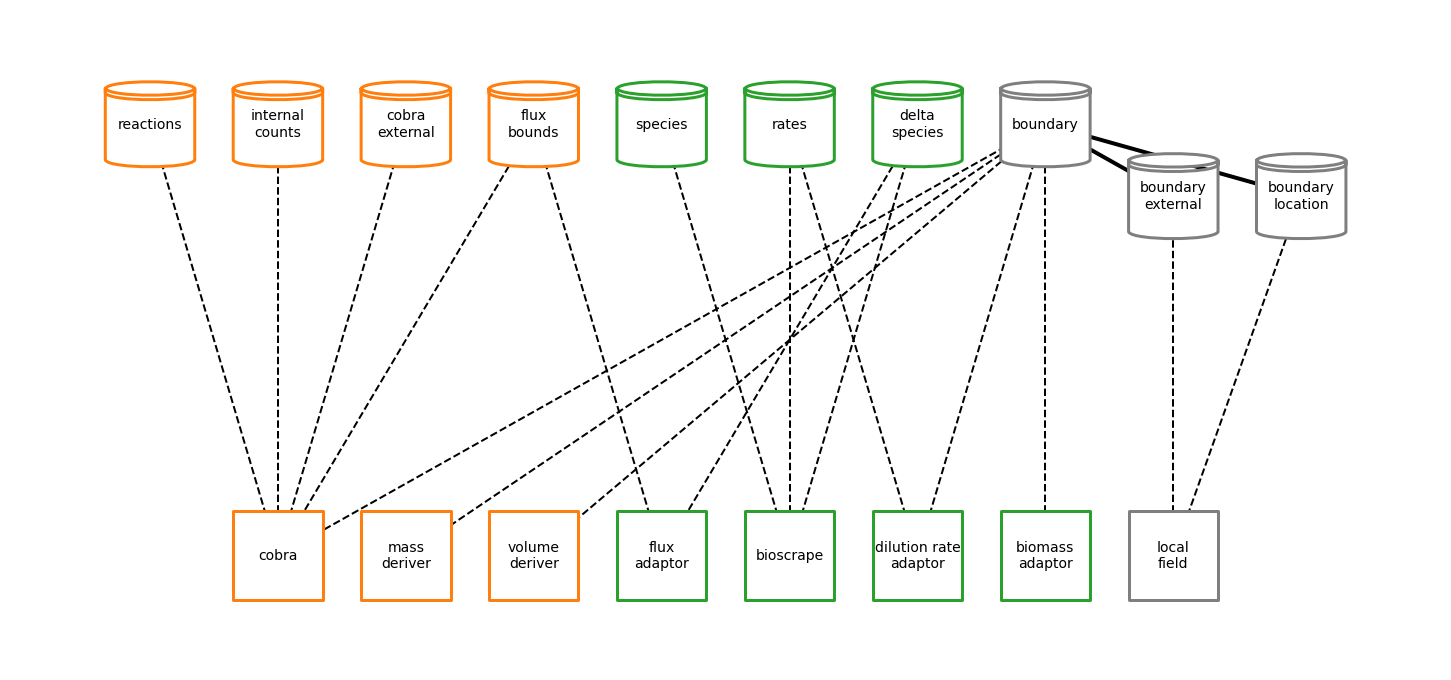

In [46]:
fig_topology = plot_topology(comp0_det, plot_config)

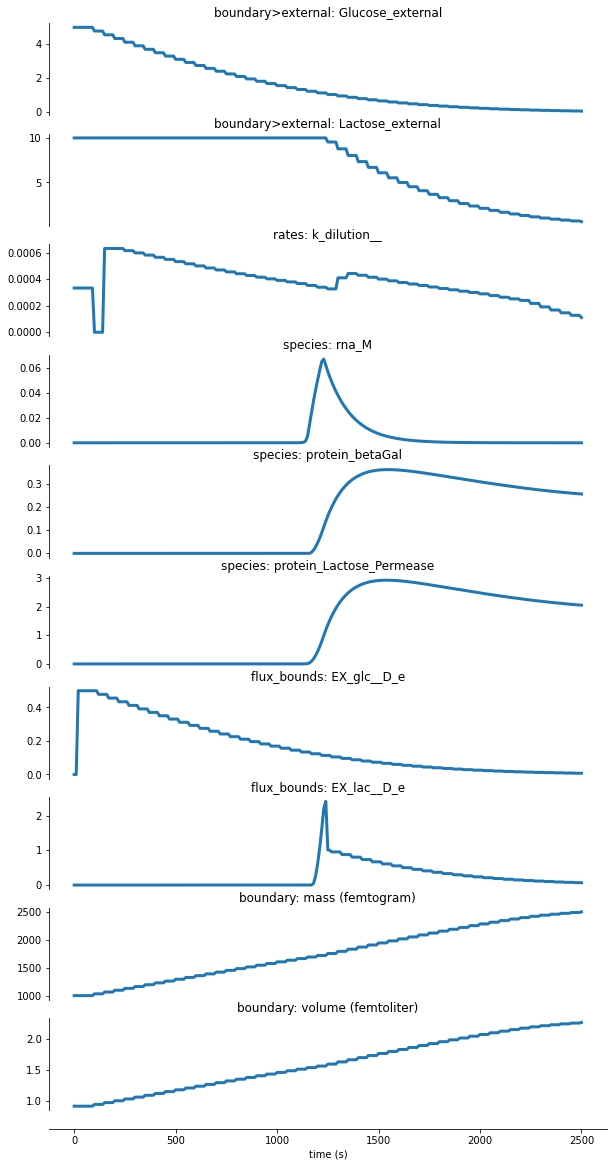

In [25]:
fig_data = plot_single(biocobra_data_det, variables = plot_variables_list_deterministic)

## 4.2 Bioscrape and COBRA in a Single Stochastic Cell

In [26]:
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_single
from vivarium.plots.topology import plot_topology

from bioscrape_cobra import helper

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config())

#Simulate
biocobra_data_stoch, comp0_stoch = simulate_bioscrape_cobra(
    initial_glucose=5, #concentration
    initial_lactose=10, #concentration
    total_time = 2500, 
    output_type='timeseries',
    stochastic = True)


Experiment ID: stochastic
Created: 03/09/2021 at 11:15:55


C:\Users\wp_ix\miniconda3\lib\site-packages\cobra\util\solver.py:508: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Completed in 257.49 seconds


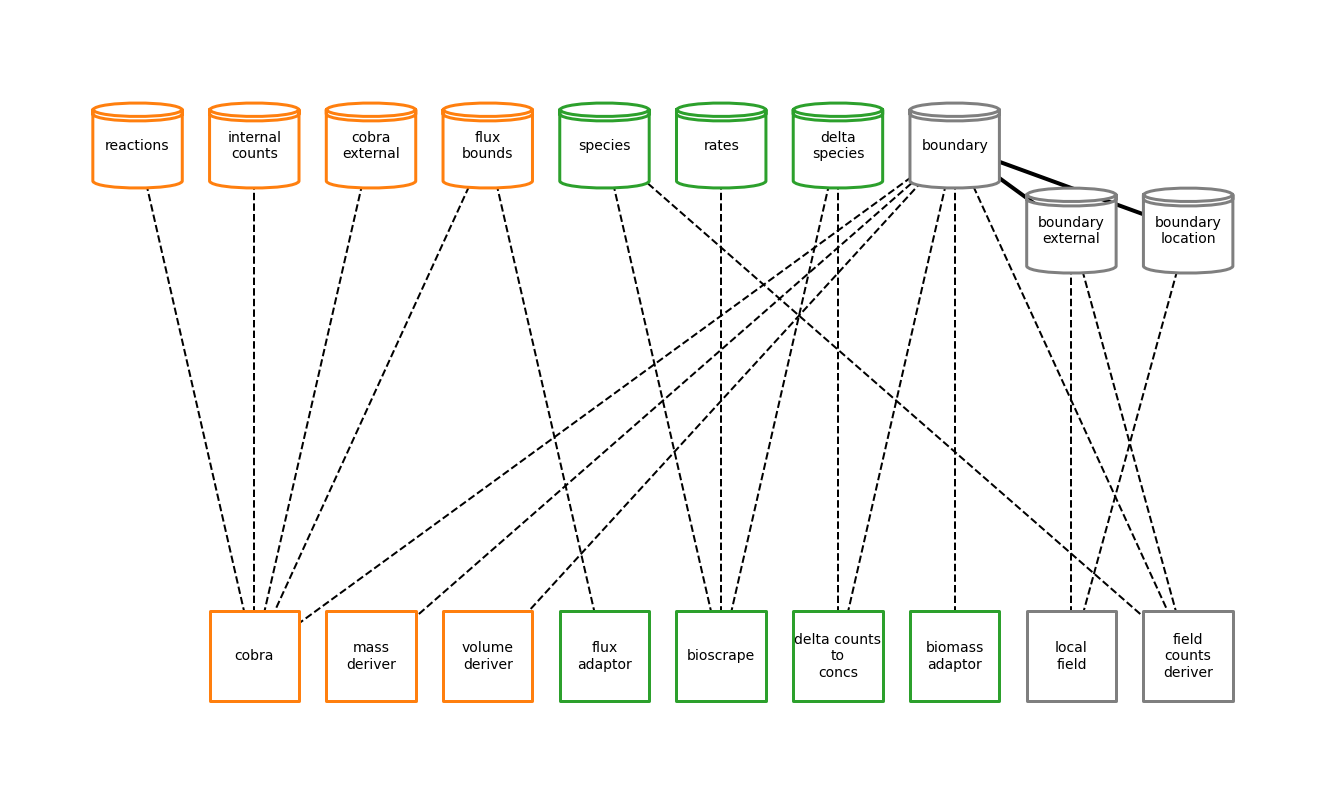

In [54]:
#plot the topology
fig_topology = plot_topology(comp0_stoch, plot_config)

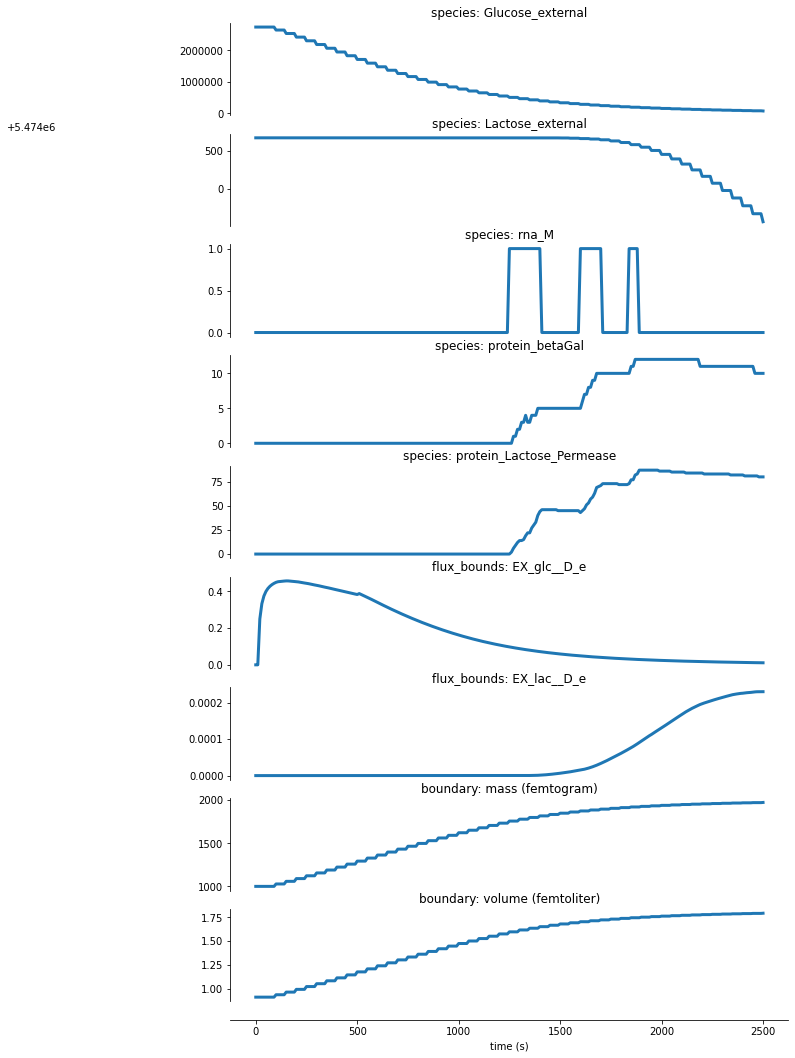

In [28]:
#plot the simulation data
fig_data = plot_single(biocobra_data_stoch, variables = plot_variables_list_stochastic)

## 4.3 Bioscrape and COBRA in an Lineage of Deterministic Cells

In [29]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

#bsc_composite_det_div = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config(division = True))

#plot the topology
#Simulate
biocobra_data_det_div, comp0_det_div = simulate_bioscrape_cobra(
    total_time = 2500,
    initial_glucose=5, #mM
    initial_lactose=10, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True)




Experiment ID: deterministic_division
Created: 03/09/2021 at 11:20:20
Completed in 8.33 seconds
Completed in 23.65 seconds
Completed in 44.18 seconds


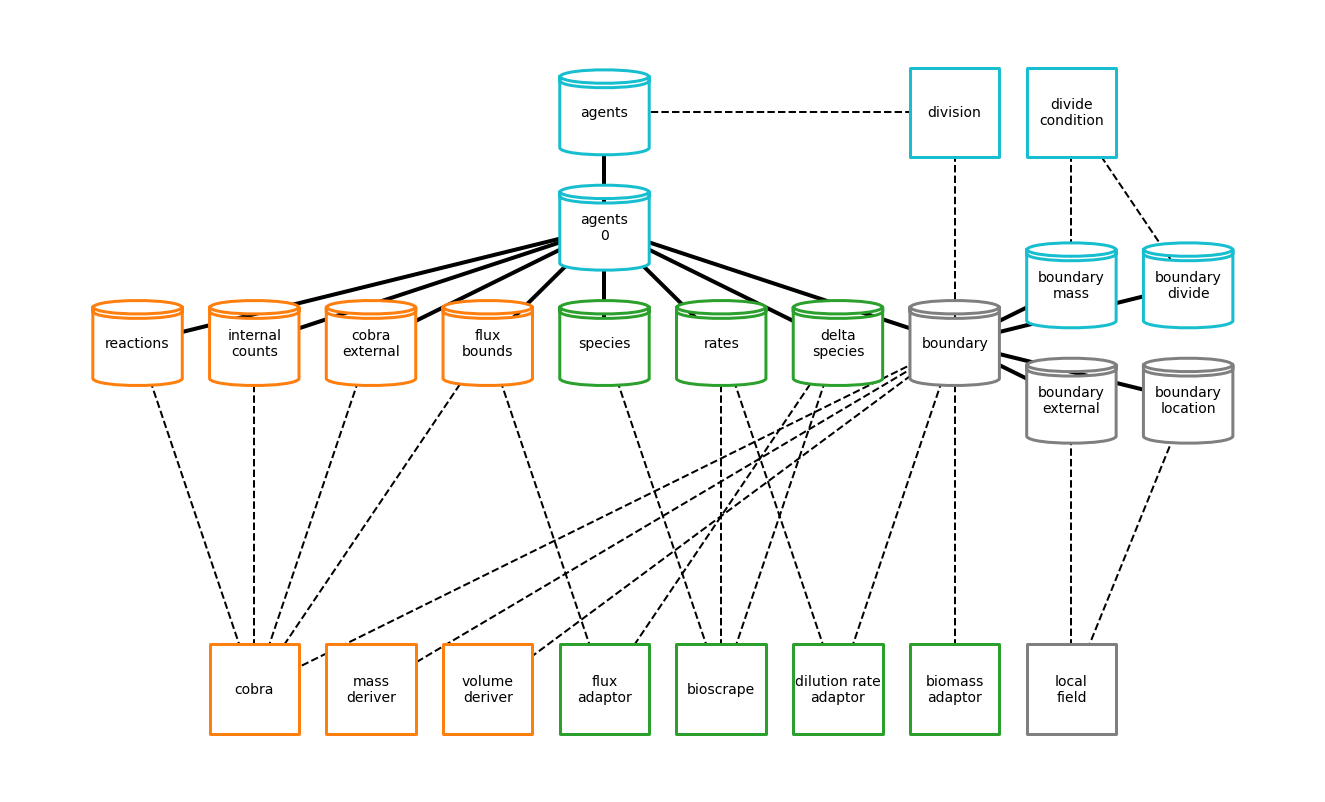

In [55]:
fig_topology = plot_topology(comp0_det_div, plot_config)

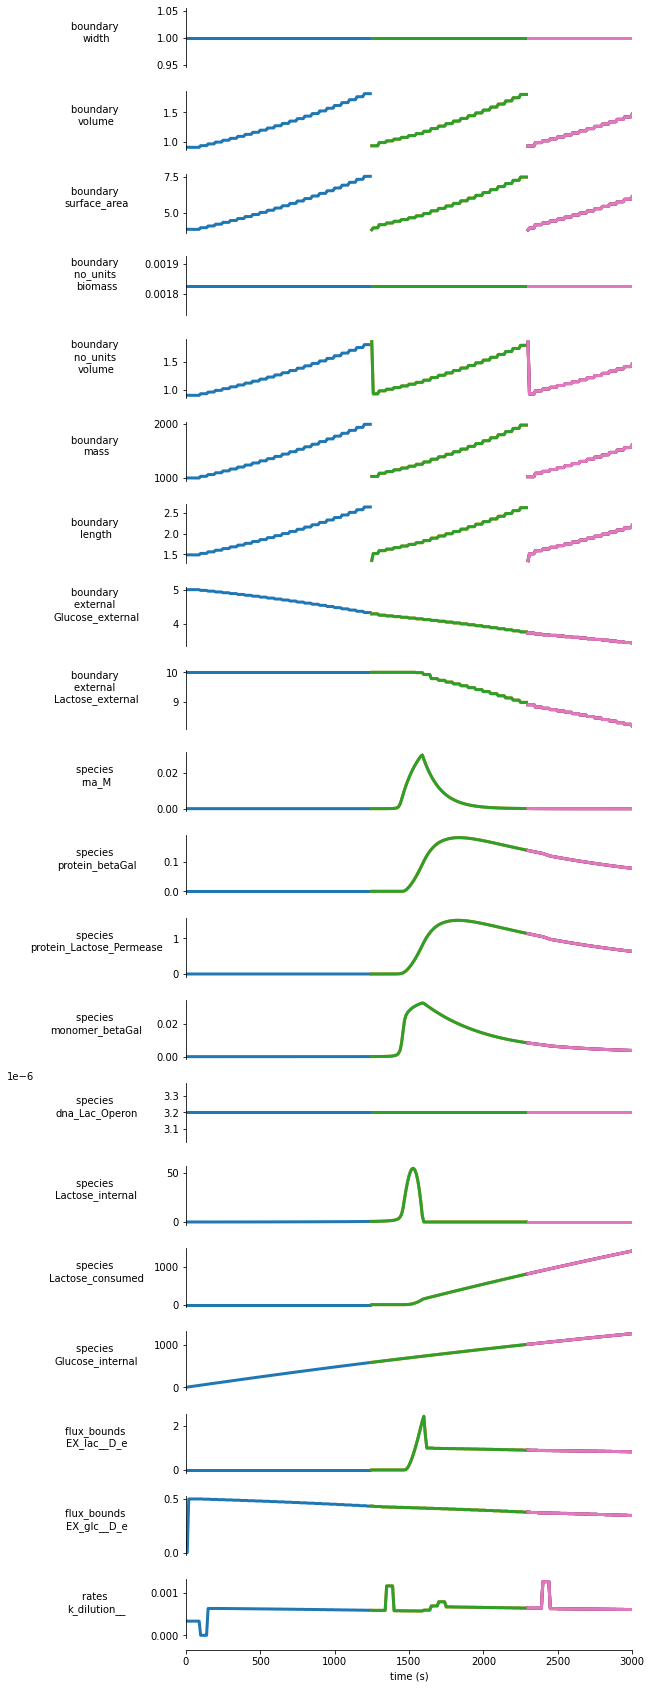

In [31]:
#plot the simulation
fig_data = plot_multigen(biocobra_data_det_div)

## 4.4 Bioscrape and COBRA in an Lineage of Stochastic Cells

In [32]:
%matplotlib inline
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_stochastic
from bioscrape_cobra.plot import plot_multigen
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units

#Simulate
biocobra_data_stoch_div, comp0_stoch_div = simulate_bioscrape_cobra(
    total_time = 4000,
    initial_glucose=5, #mM
    initial_lactose=5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #maximum total cells to simulate
    output_type='unitless', 
    division = True,
    stochastic = True)

# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch_div = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True))
#config = {'graph_format': 'hierarchy'}



Experiment ID: stochastic_division
Created: 03/09/2021 at 11:21:46
Completed in 298.87 seconds
Completed in 432.95 seconds
Completed in 648.16 seconds


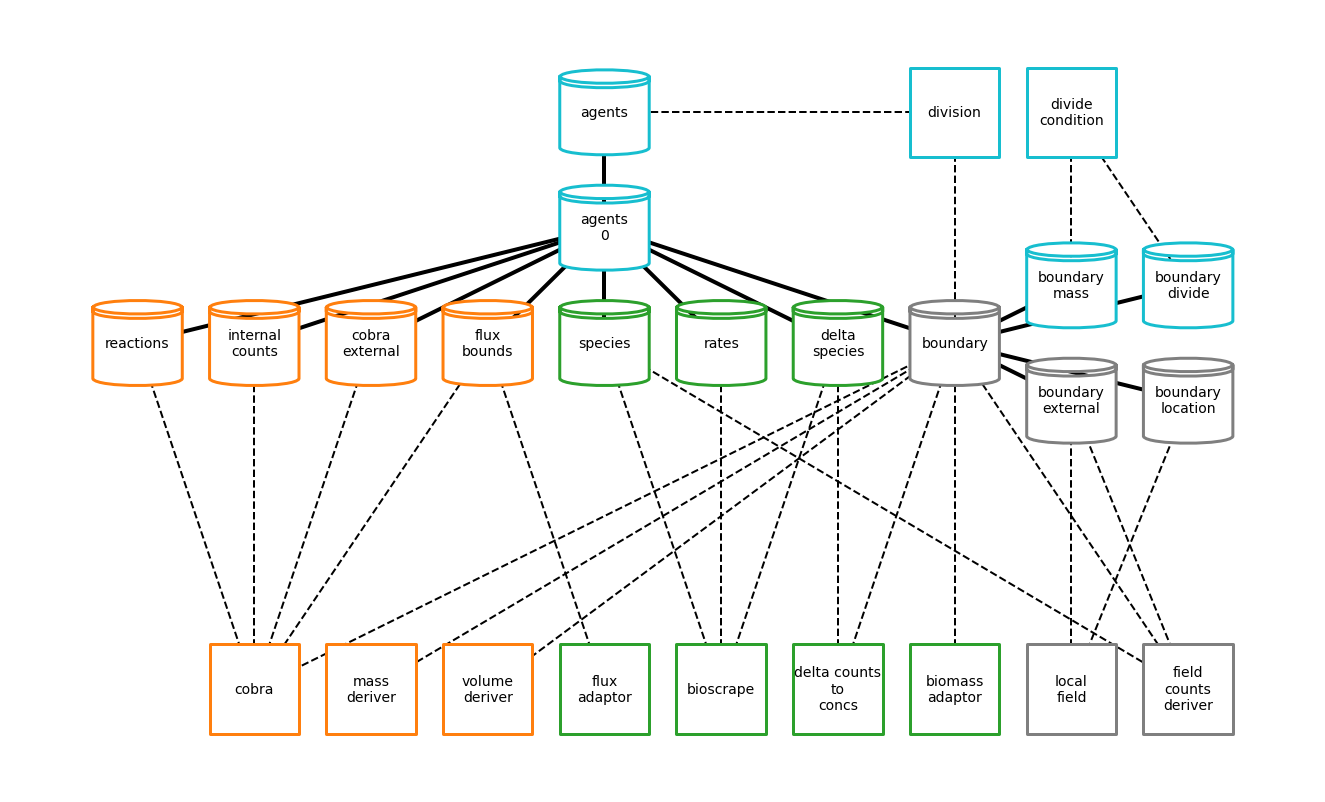

In [56]:
fig_topology = plot_topology(comp0_stoch_div, plot_config)

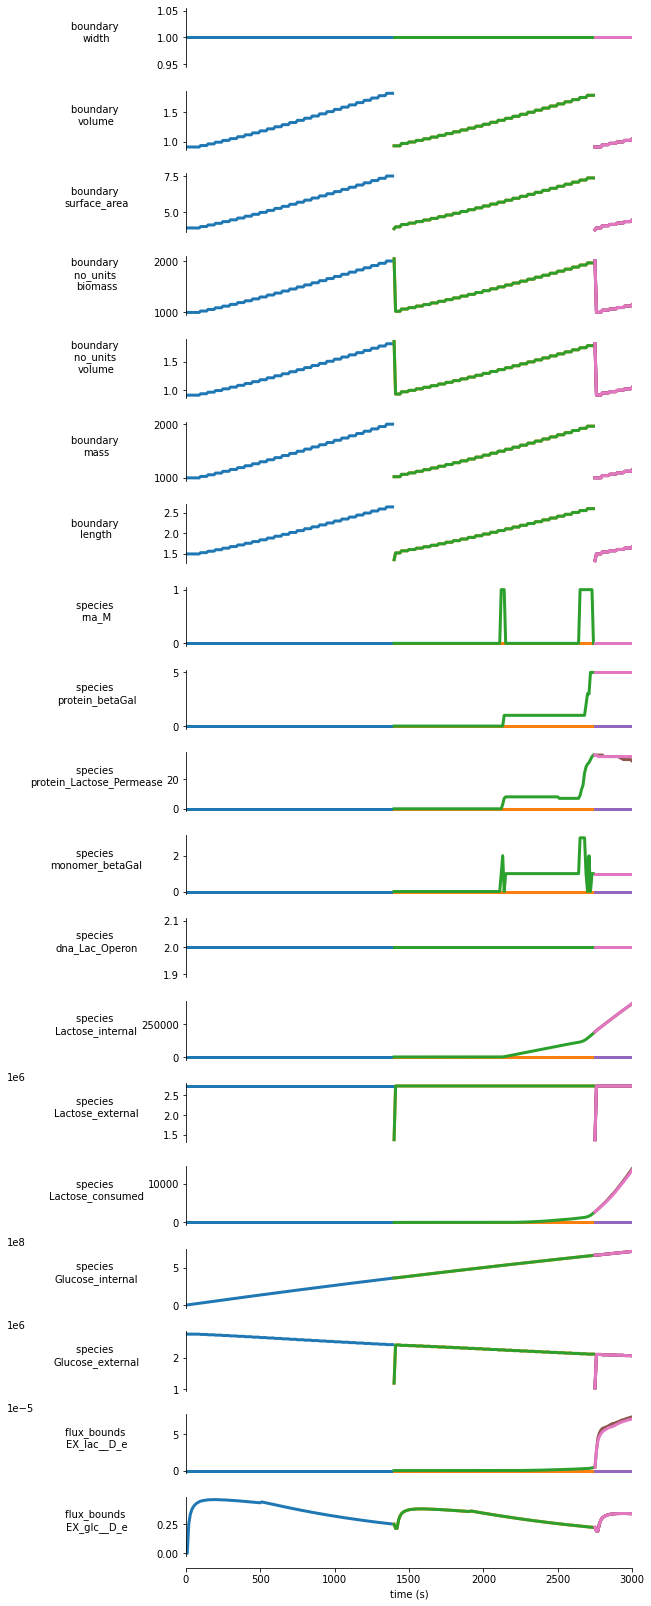

In [34]:
#Plot the Simulation
fig_data = plot_multigen(biocobra_data_stoch_div)

## 4.5 Bioscrape and COBRA in an Lineage of Deterministic Cells on a Lattice

In [35]:
%matplotlib inline 
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_deterministic import BioscrapeCOBRAdeterministic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields_snapshots, plot_fields_tags
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units


#Simulate
bounds = [10, 10]
biocobra_data_det_div_spa, comp0_det_div_spa = simulate_bioscrape_cobra(
    total_time = 1000,
    initial_glucose=5, #mM
    initial_lactose=5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 2, #maximum total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)


# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_det_div_spa = BioscrapeCOBRAdeterministic(get_bioscrape_cobra_config(division = True, spatial = True))




Experiment ID: deterministic_division_spatial
Created: 03/09/2021 at 11:44:58
Completed in 12.93 seconds
Completed in 122.02 seconds


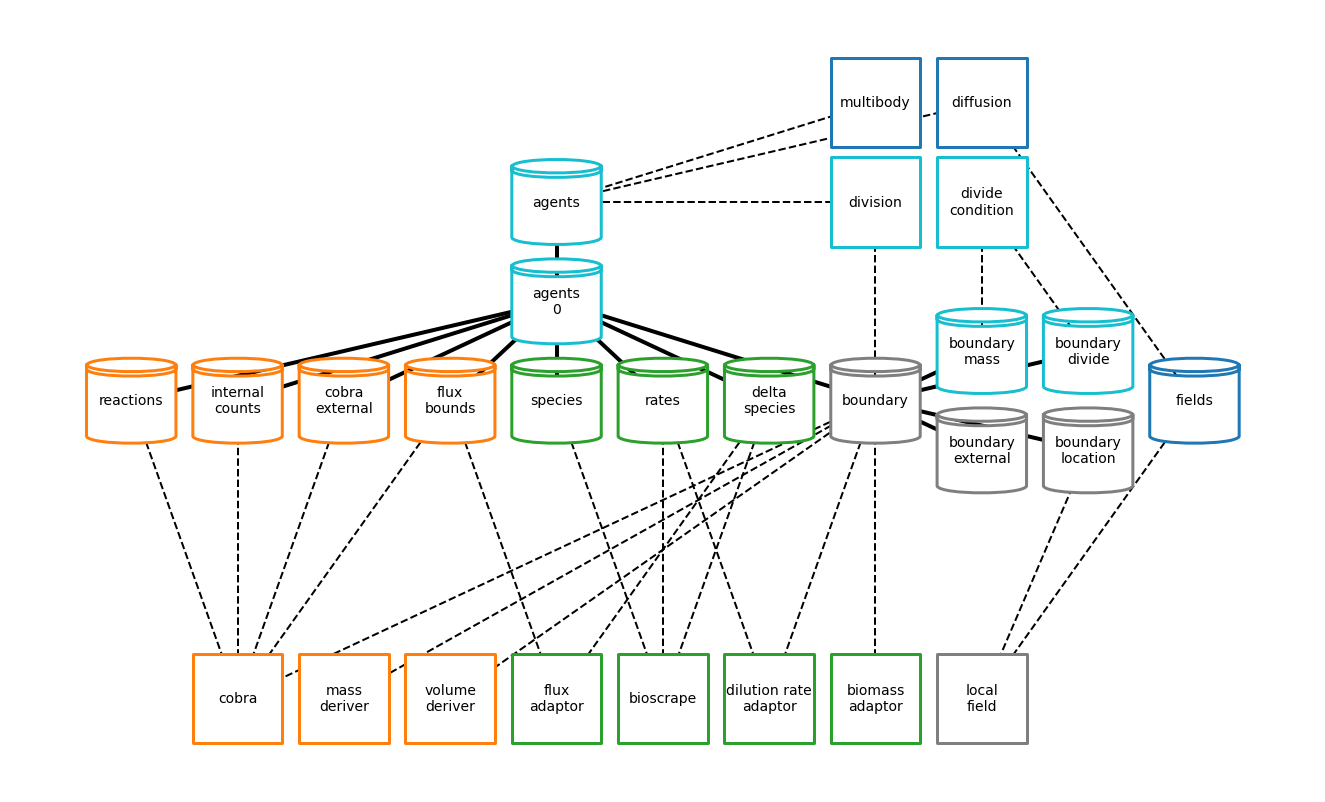

In [61]:
fig_topology = plot_topology(comp0_det_div_spa, plot_config)

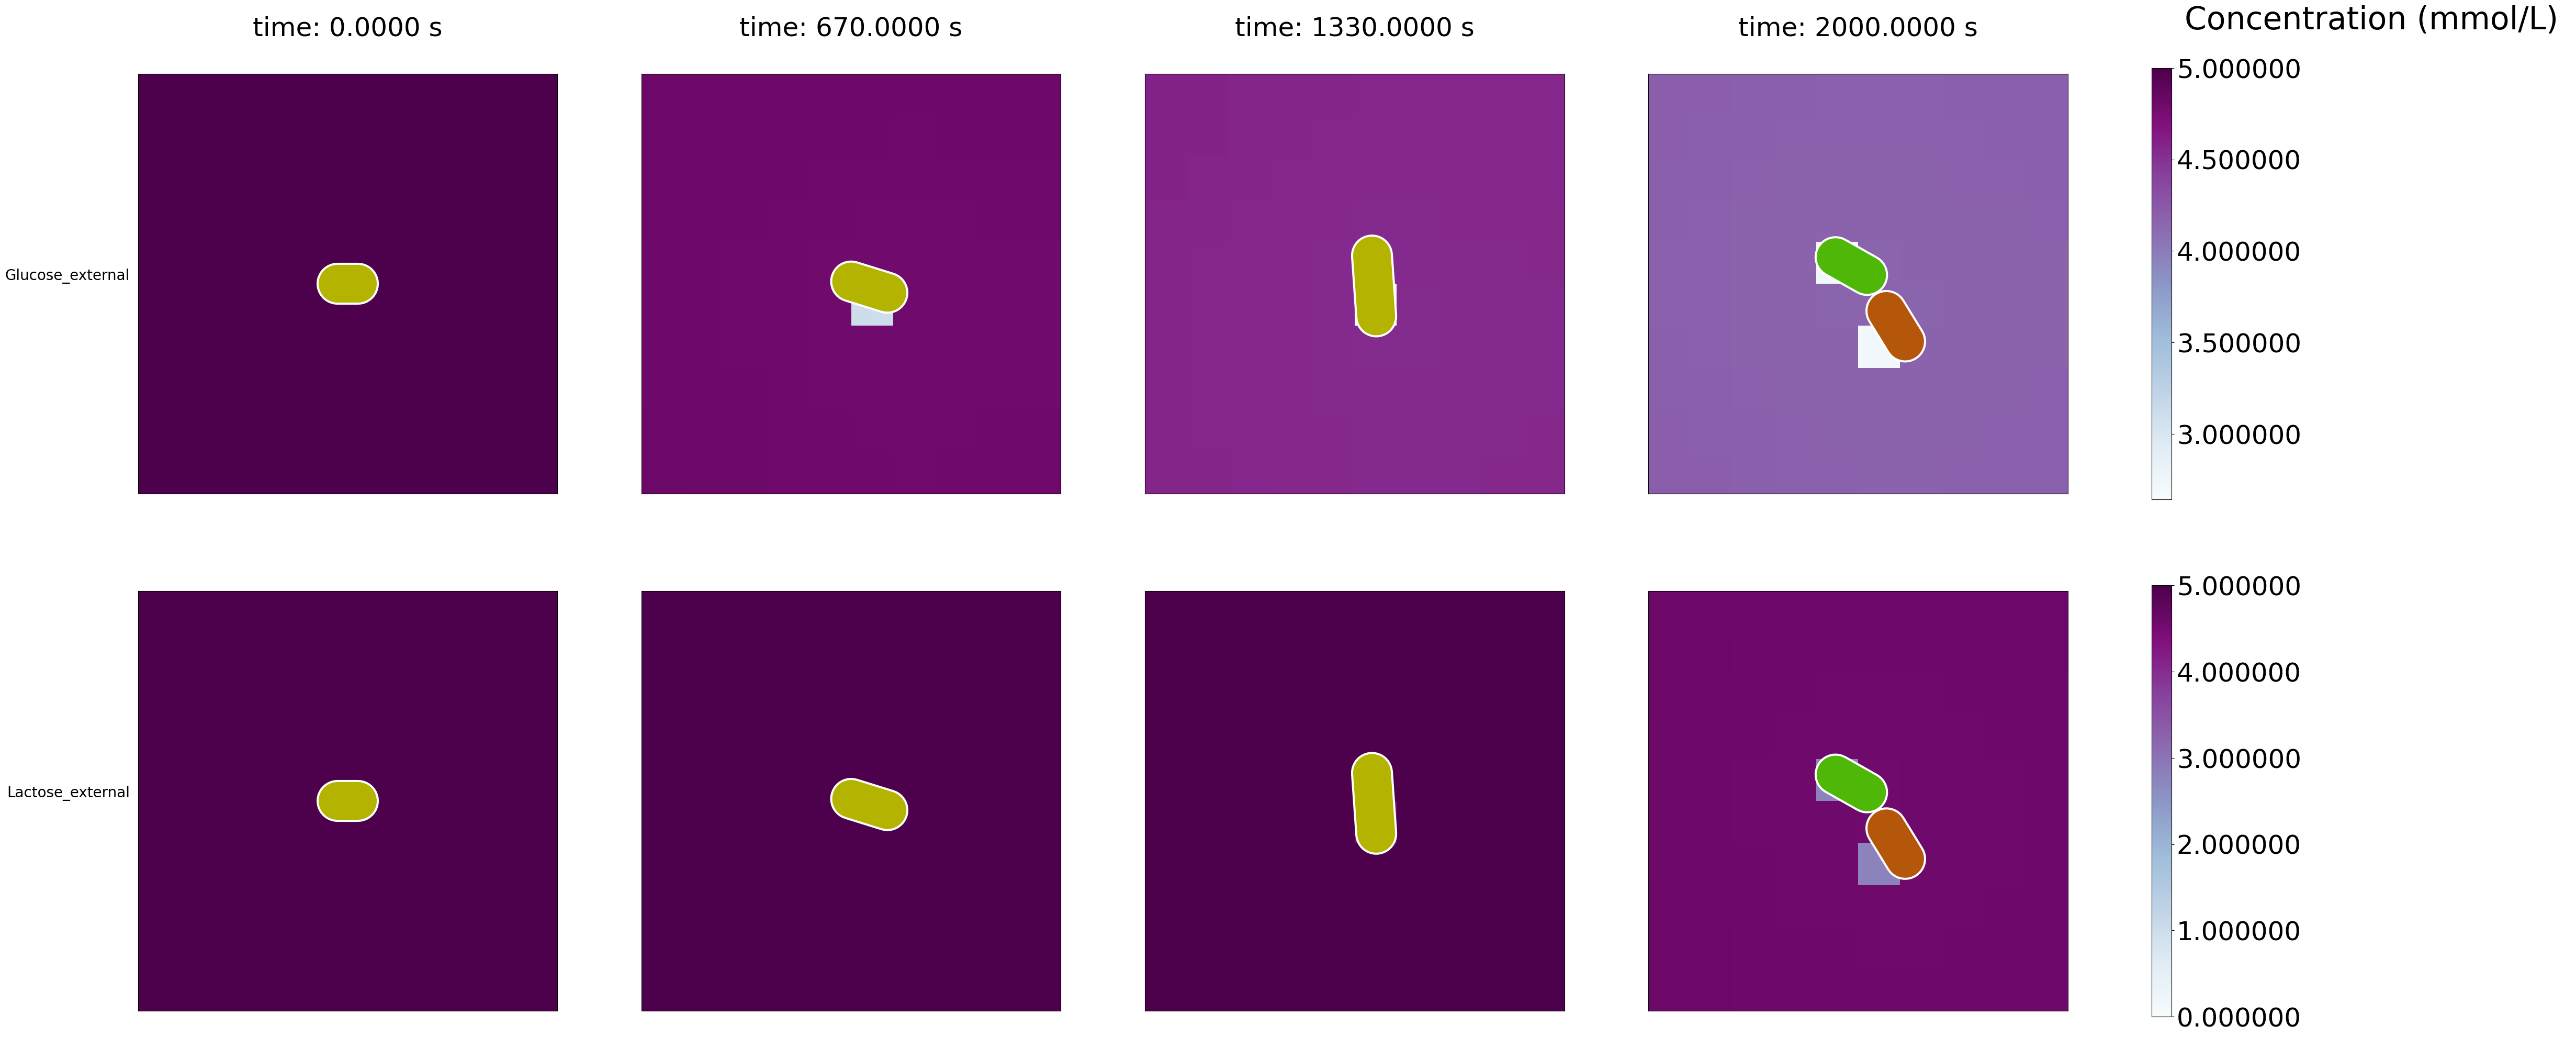

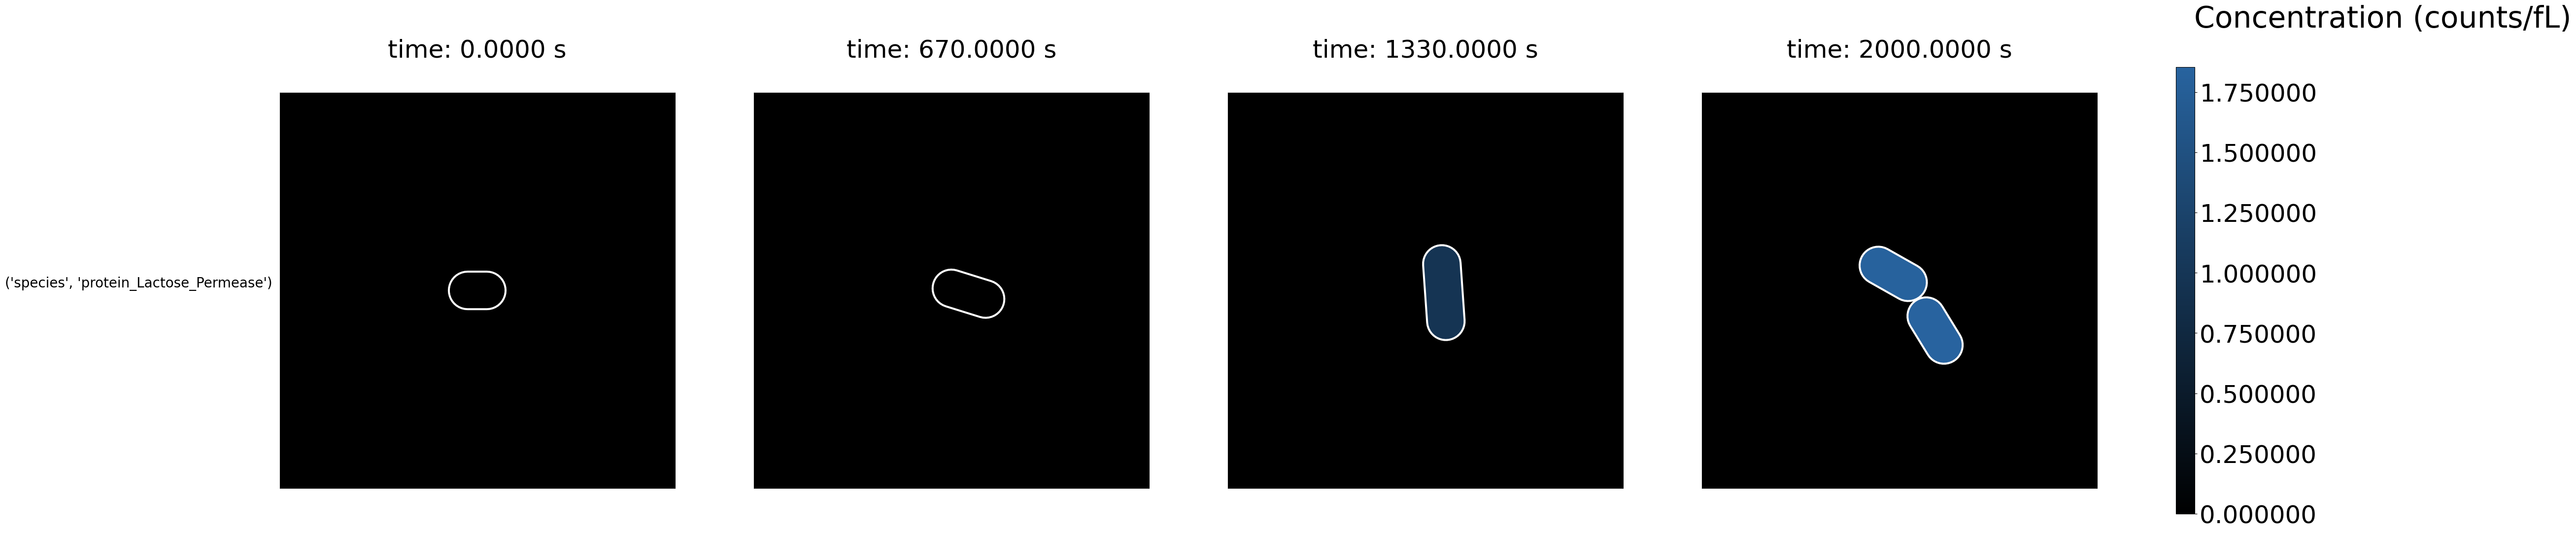

In [37]:
#Plot
fig_snapshots = plot_fields_snapshots(
    biocobra_data_det_div_spa,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data_det_div_spa,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
plt.show()

## 4.6 Bioscrape and COBRA in an Lineage of Stochastic Cells on a Lattice

In [38]:
%matplotlib inline
import pylab as plt
from bioscrape_cobra.bioscrape_cobra_stochastic import BioscrapeCOBRAstochastic
from bioscrape_cobra.simulate import get_bioscrape_cobra_config, simulate_bioscrape_cobra, plot_variables_list_deterministic
from bioscrape_cobra.plot import plot_fields_snapshots, plot_fields_tags
from vivarium.plots.topology import plot_topology
from vivarium.library.units import units


# Show full topology here
#TODO wrap this so I can get the Composite before simulating
#bsc_composite_stoch_div_spa = BioscrapeCOBRAstochastic(get_bioscrape_cobra_config(division = True, spatial = True))

#Simulate
bounds = [5, 5]
biocobra_data_stoch_div_spa, comp0_stoch_div_spa = simulate_bioscrape_cobra(
    total_time = 2500,
    initial_glucose= 5, #mM
    initial_lactose= 5, #mM
    divide_threshold=2000 * units.fg, #how big a cell is when it divides
    halt_threshold = 4, #how total cells to simulate
    bounds = bounds, #size of the lattice (microns)
    n_bins = [10, 10] , #number of lattice grid points
    output_type='unitless', 
    division = True,
    spatial = True)


Experiment ID: deterministic_division_spatial
Created: 03/09/2021 at 11:48:16
Completed in 85.02 seconds
Completed in 52.37 seconds
Completed in 173.64 seconds


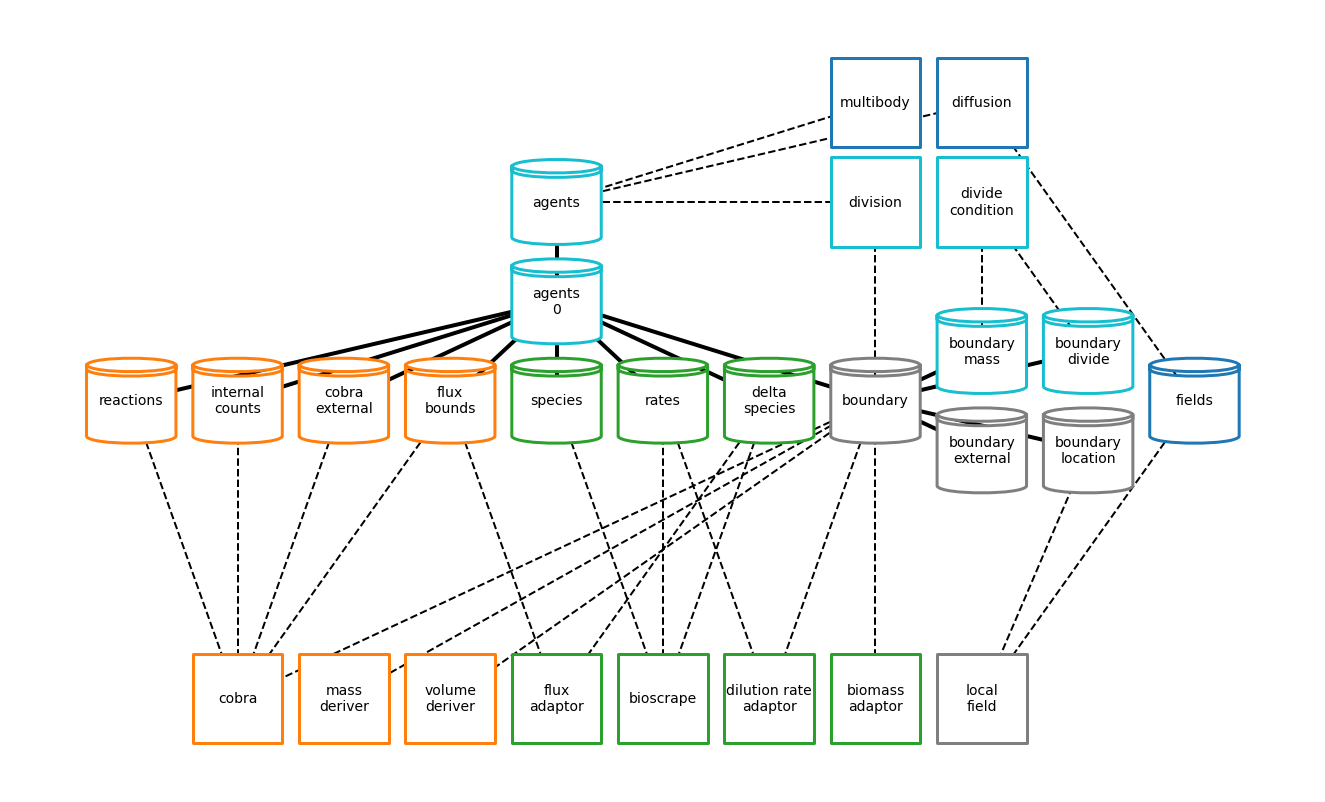

In [60]:
fig_topology = plot_topology(comp0_stoch_div_spa, plot_config)

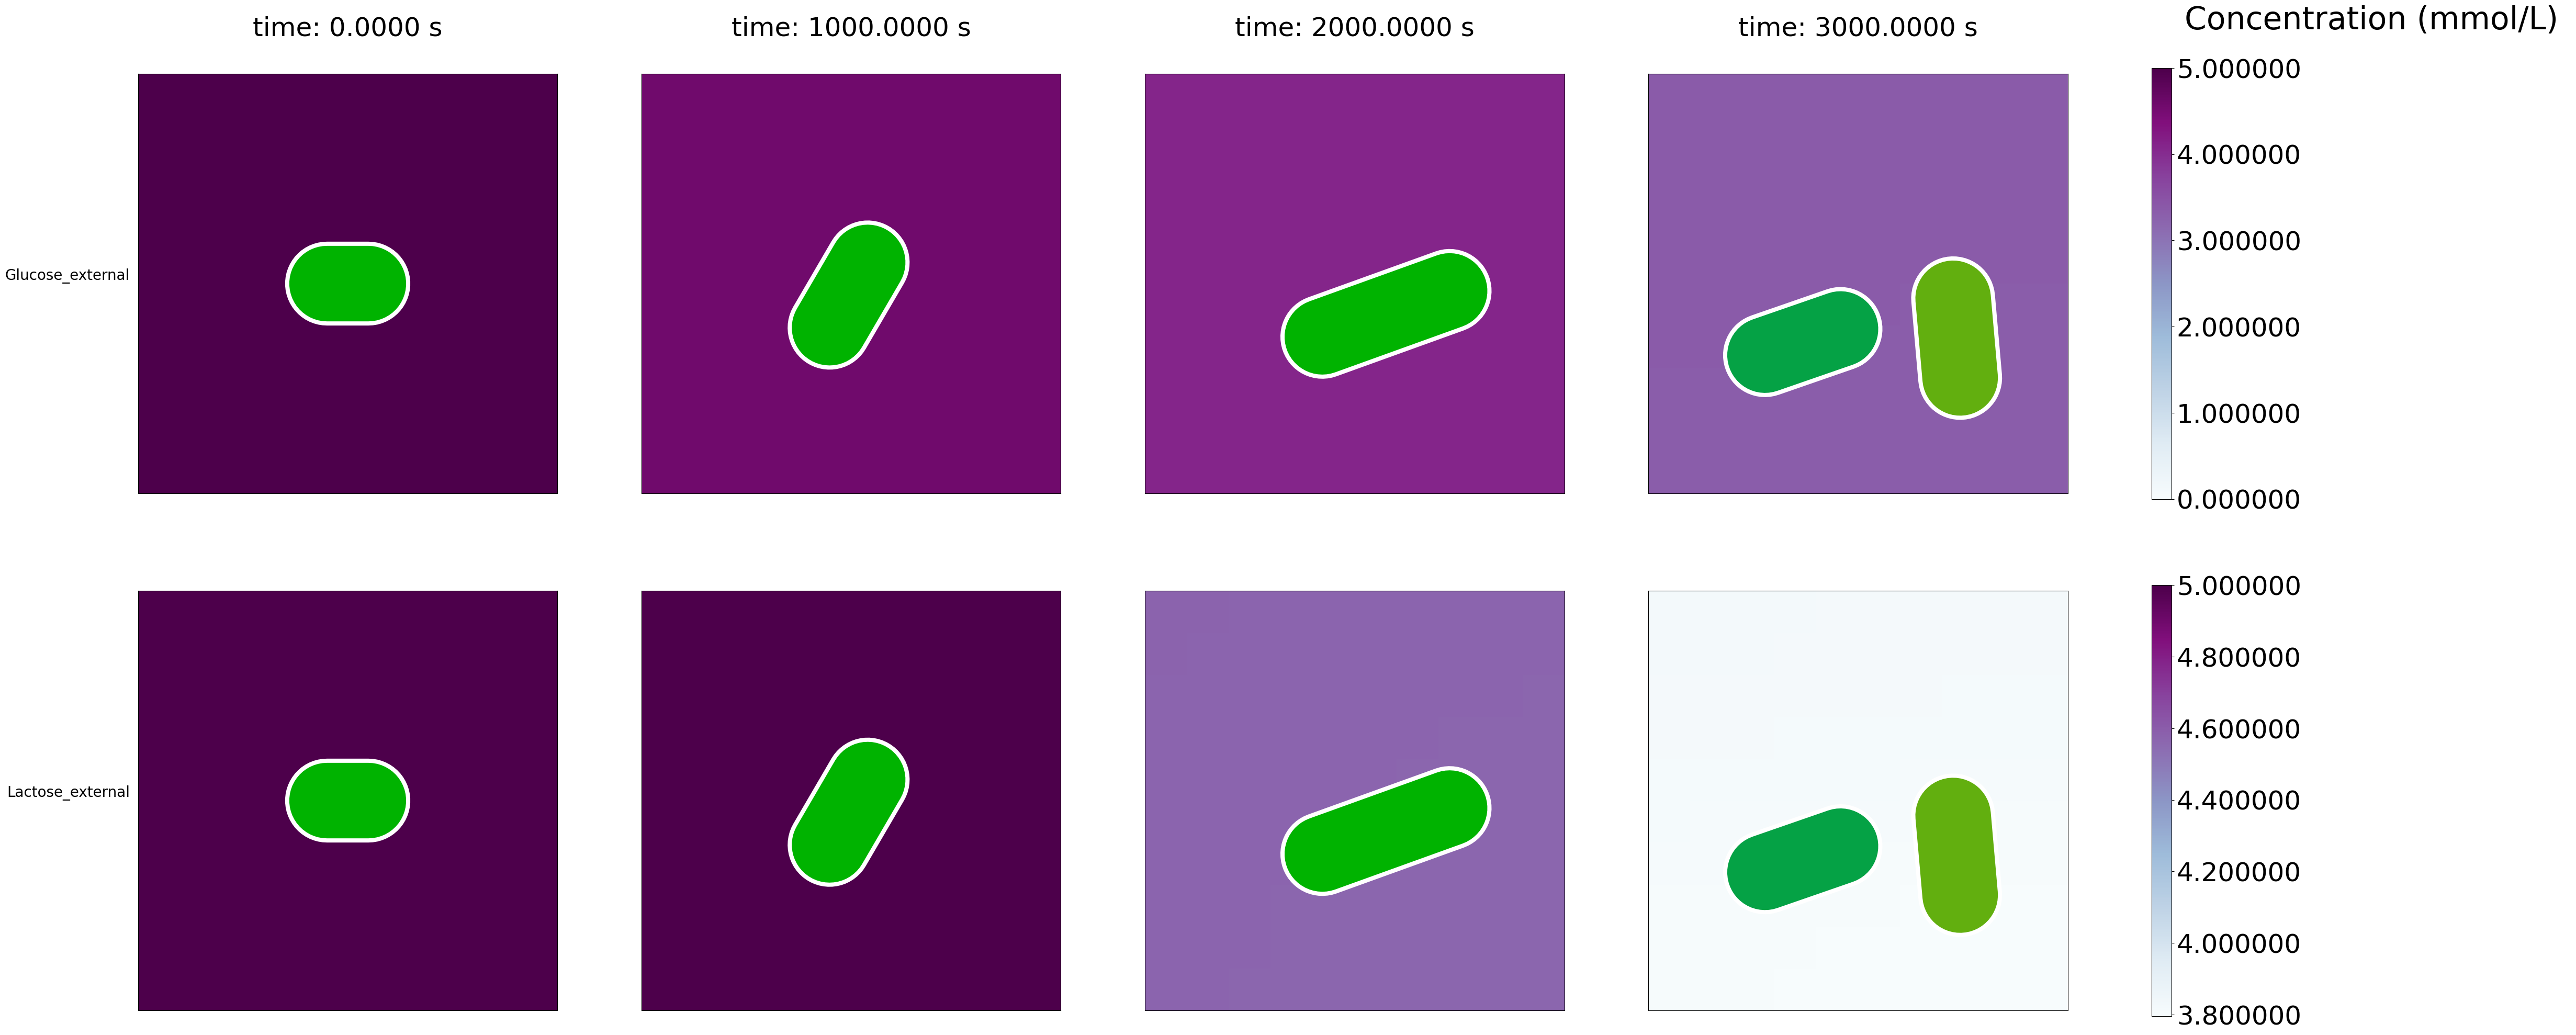

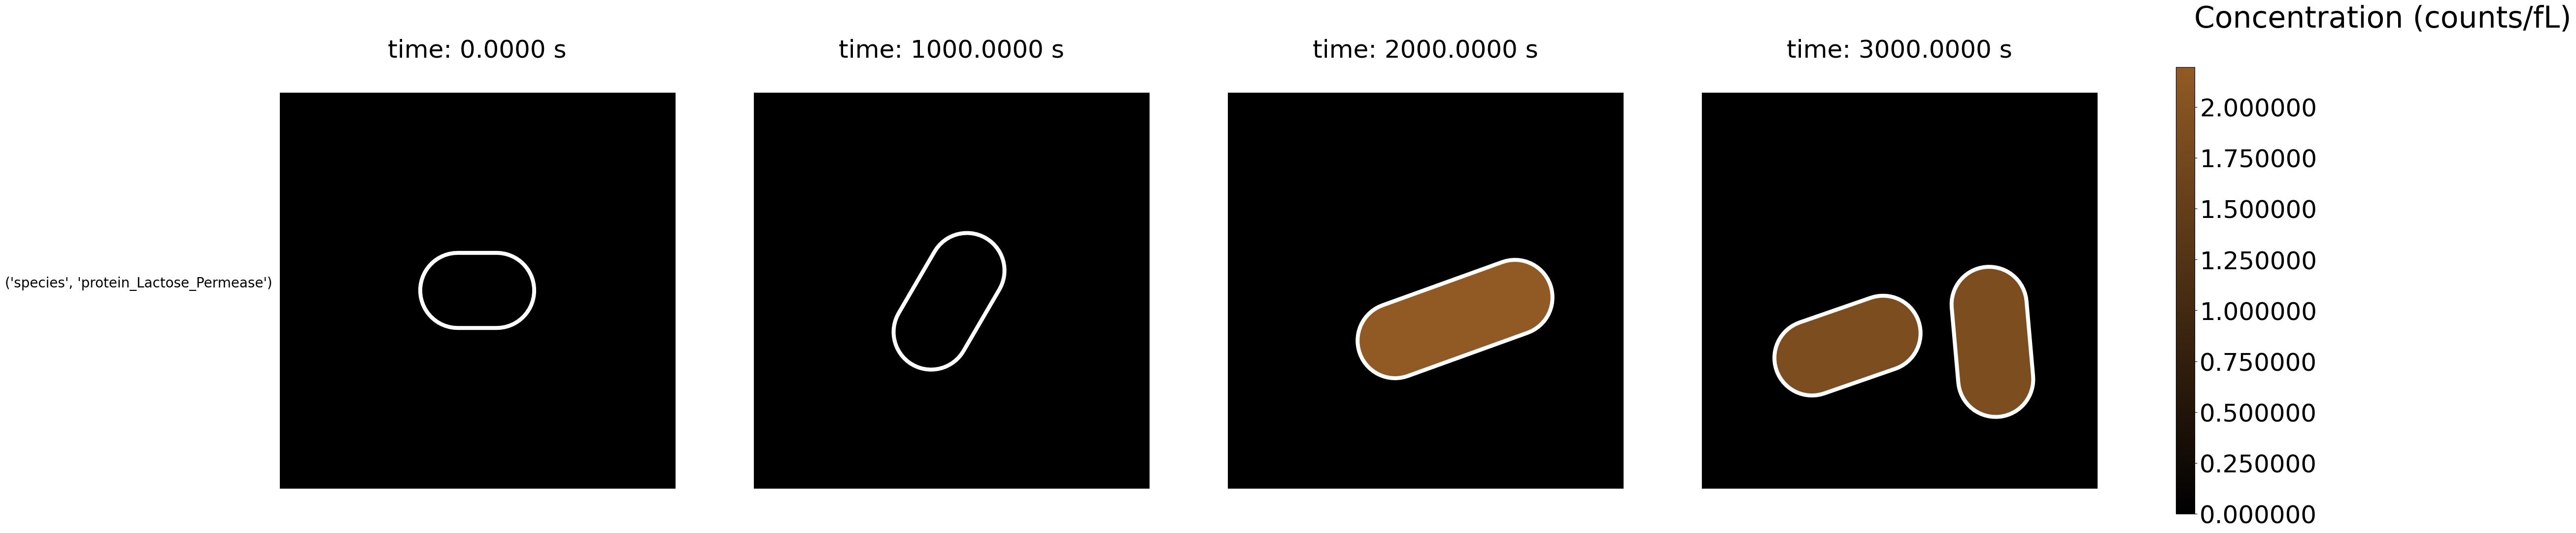

In [40]:
# Plot
fig_snapshots = plot_fields_snapshots(
    biocobra_data_stoch_div_spa,
    bounds=bounds,
    include_fields=['Glucose_external', 'Lactose_external'])
plt.show()

fig_tags = plot_fields_tags(
    biocobra_data_stoch_div_spa,
    bounds=bounds,
    tagged_molecules=[('species', 'protein_Lactose_Permease',)])
plt.show()